## CREATE AN ESTIMATOR TO PREDICT THE SALE PRICE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Ames_Housing_Data.csv')

In [4]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## SCENARIO

were given a set of past data regarding the sale price of houses based on its quality and features

create a web with an estimator that could help to predict the sale price of unknown data 

users should be able to fill in few features and could predict the sale price

## EXPLORATORY DATA ANALYSIS

understanding the data

visualize data

assumption of the data

Why??

In [5]:
len(df)

# total of 2930 houses

2930

In [6]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [7]:
df.PID.nunique()

# checking if there is any repition of users in the data set

2930

In [8]:
df.info() 

# there is some missing value on several of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [9]:
df['Lot Area'].describe()


count      2930.000000
mean      10147.921843
std        7880.017759
min        1300.000000
25%        7440.250000
50%        9436.500000
75%       11555.250000
max      215245.000000
Name: Lot Area, dtype: float64

In [10]:
df['Year Built'].describe()

# the house available in data is from 1872 to 2010 
# range of 138 years 
# most likely there will be some features that only available for newer house 
# thats why there is some missing value in the data..maybe

count    2930.000000
mean     1971.356314
std        30.245361
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: Year Built, dtype: float64

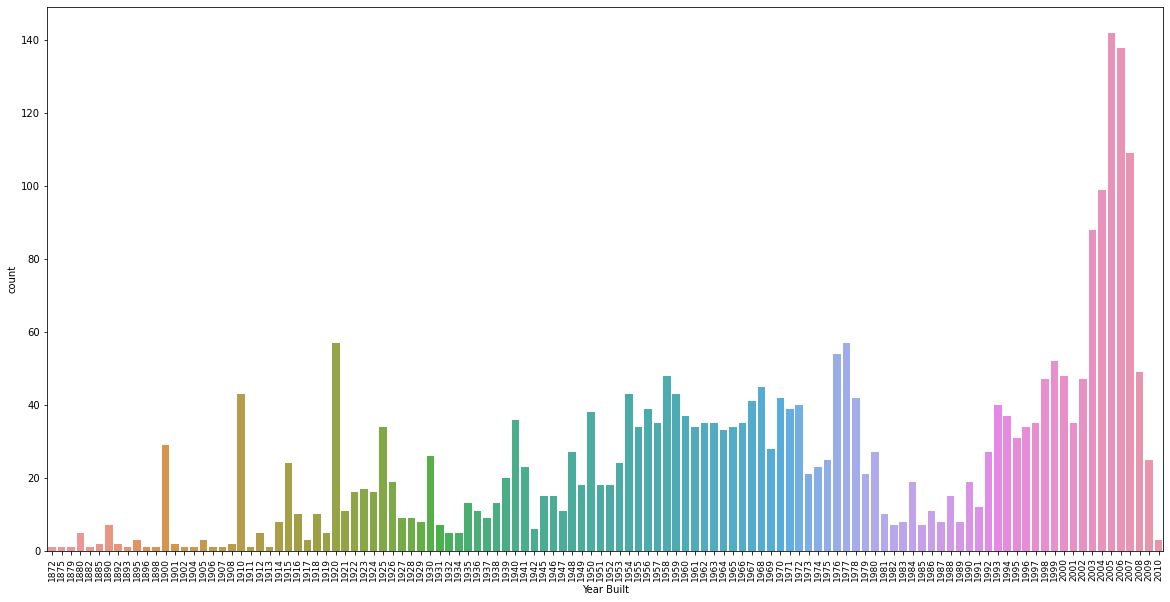

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x='Year Built',data=df)
plt.xticks(rotation=90,fontsize=9)
plt.show()

# most house in the data set is newer house

In [12]:
df.SalePrice.describe()

# maximum price value is RM 755000
# minimum sale price is RM 12789
# the average sale price is about RM 180000

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

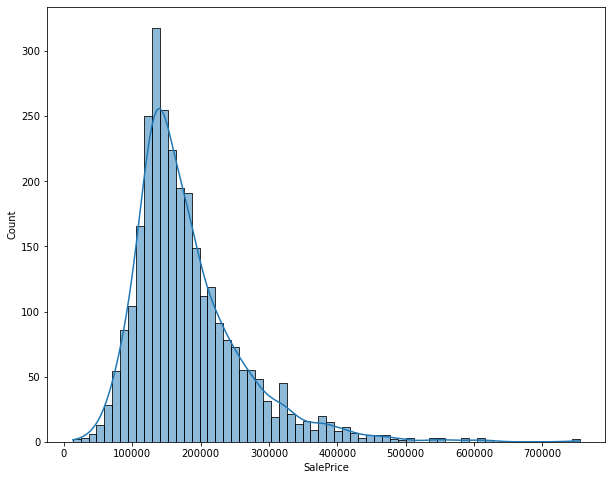

In [13]:
plt.figure(figsize=(10,8))
sns.histplot(x='SalePrice',data=df,kde=True);

# the sale price data is skewed left
# may need to remove the outliers above 500k

In [18]:
from scipy.stats import skew,norm

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness: 1.743500


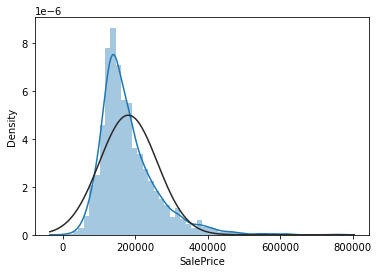

In [22]:
# Kernel Density Plot

sns.distplot(df.SalePrice,fit=norm);
plt.ylabel=('Frequency')
plt.title=('SalePrice distribution');

# Get the fitted parameters used by the function

(mu, sigma) = norm.fit(df['SalePrice']);

print("skewness: %f" % df['SalePrice'].skew());

our understanding so far :
    
most house in the data set is newer houses

however, the most price is below 200k with several outliers above the value

## FEATURE ENGINEERING

**DEALING WITH OUTLIERS**

## Sale Price

In [13]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

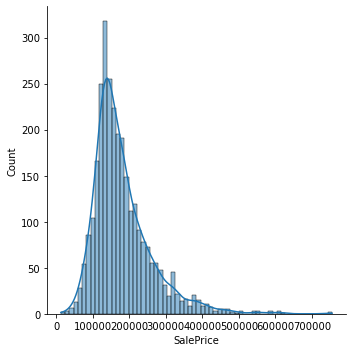

In [14]:
sns.displot(data=df,x='SalePrice',kde=True);

# it return normal dsitribution
# observe the distribution of the SalePrice of the dataset

In [15]:
df.loc[df['SalePrice']>=700000]['Overall Qual']

# the outliers of saleprice is above the 700000 which has the highest overall quality

1760    10
1767    10
Name: Overall Qual, dtype: int64

In [16]:
df.drop([1760,1767],axis=0,inplace=True)

# decide to remove it because it is way to far from the mean for sale price of 10 overall quality
# the value may affect the distribution of the saleprice

In [17]:
df[df['SalePrice']>=500000][['Overall Qual','SalePrice']]

,Overall Qual,SalePrice
15,8,538000
44,9,611657
46,9,500000
366,9,501837
423,10,555000
432,10,610000
433,9,582933
456,10,552000
1063,10,615000
1637,9,591587


In [18]:
df.drop([15,44,46,366,423,432,433,456,1063,1637,1701,2330,2332,2334,2445,2450],axis=0,inplace=True)

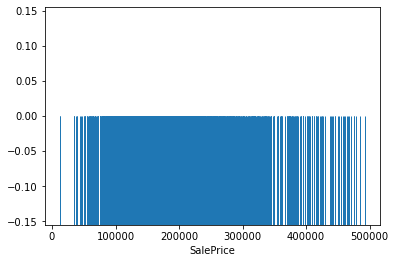

In [19]:
sns.rugplot(x='SalePrice',data=df,height=0.5);

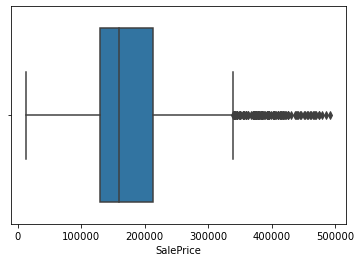

In [20]:
sns.boxplot(x='SalePrice',data=df);

In [21]:
df.index[df['SalePrice']<=200]

df.drop([181, 709, 726, 1553, 1555, 1901, 2843, 2880],axis=0,inplace=True)

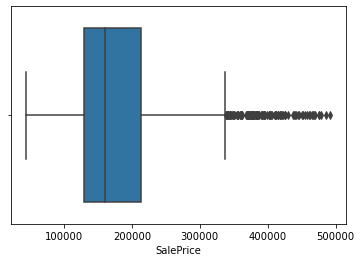

In [22]:
sns.boxplot(x='SalePrice',data=df);

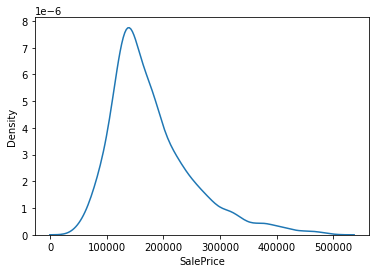

In [23]:
sns.kdeplot(x='SalePrice',data=df);

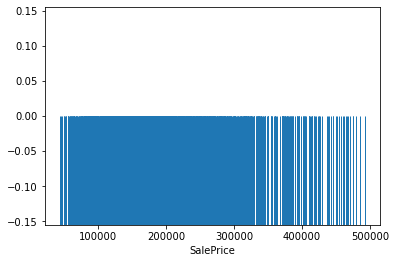

In [24]:
sns.rugplot(x='SalePrice',data=df,height=0.5);

## Overall Quality

In [25]:
df.corr()['Overall Qual'].sort_values()

PID               -0.251987
Kitchen AbvGr     -0.162945
Enclosed Porch    -0.138083
Overall Cond      -0.103590
BsmtFin SF 2      -0.049929
Low Qual Fin SF   -0.049348
Bsmt Half Bath    -0.045033
Yr Sold           -0.021081
Misc Val           0.006044
Pool Area          0.013244
3Ssn Porch         0.019609
Screen Porch       0.027650
Mo Sold            0.034995
MS SubClass        0.042314
Bedroom AbvGr      0.050558
Lot Area           0.080781
Bsmt Full Bath     0.154352
Lot Frontage       0.197903
2nd Flr SF         0.232811
Wood Deck SF       0.244965
Half Bath          0.257164
BsmtFin SF 1       0.259262
Bsmt Unf SF        0.269807
Open Porch SF      0.302481
TotRms AbvGrd      0.357263
Fireplaces         0.382328
Mas Vnr Area       0.405966
1st Flr SF         0.452819
Full Bath          0.513147
Total Bsmt SF      0.525598
Gr Liv Area        0.550456
Garage Area        0.554198
Year Remod/Add     0.565043
Garage Yr Blt      0.566153
Garage Cars        0.591740
Year Built         0

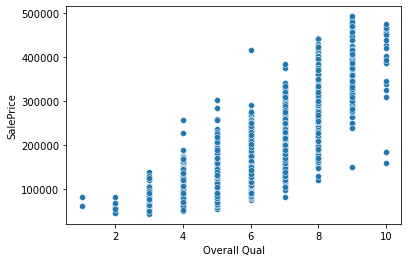

In [26]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);

In [27]:
df.index[df['Overall Qual']==9] & df.index[df['SalePrice']<=200000]

print(df.loc[[1182]][['Gr Liv Area','Garage Cars','Overall Qual','SalePrice']])

df.drop([1182],axis=0,inplace=True)

# decide to drop it bcs for the overall quality and garage cars amount and gr liv area..the price should be higher 

      Gr Liv Area  Garage Cars  Overall Qual  SalePrice
1182         2944          3.0             9     150000


In [28]:
df.index[df['Overall Qual']==6] & df.index[df['SalePrice']>=400000]

print(df.loc[[2737]][['SalePrice']])

df.drop([2737],axis=0,inplace=True)

      SalePrice
2737     415000


In [29]:
df.index[df['Overall Qual']==10] & df.index[df['SalePrice']<=200000]

print(df.loc[[1498,2180,2181]][['SalePrice','Overall Qual']])

df.drop([1498,2180,2181],axis=0,inplace=True)

      SalePrice  Overall Qual
1498     160000            10
2180     183850            10
2181     184750            10


In [30]:
df.index[df['Overall Qual']==7] & df.index[df['SalePrice']>=340000]

print(df.loc[[1106,2096]][['Gr Liv Area','Garage Cars','Overall Qual','SalePrice']])

df.drop([1106,2096],axis=0,inplace=True)

      Gr Liv Area  Garage Cars  Overall Qual  SalePrice
1106         2418          3.0             7     341000
2096         2696          3.0             7     383970


In [31]:
df.index[df['Overall Qual']==4] & df.index[df['SalePrice']>=200000]

print(df.loc[[1402,1569]][['Gr Liv Area','Garage Cars','Overall Qual','SalePrice']])

df.drop([1402,1569],axis=0,inplace=True)

      Gr Liv Area  Garage Cars  Overall Qual  SalePrice
1402         1663          2.0             4     256000
1569         1689          2.0             4     228500


In [32]:
df.index[df['Overall Qual']==5] & df.index[df['SalePrice']>=300000]

print(df.loc[[1945]][['Gr Liv Area','Garage Cars','Overall Qual','SalePrice']])

df.drop([1945],axis=0,inplace=True)

      Gr Liv Area  Garage Cars  Overall Qual  SalePrice
1945         3086          3.0             5     301600


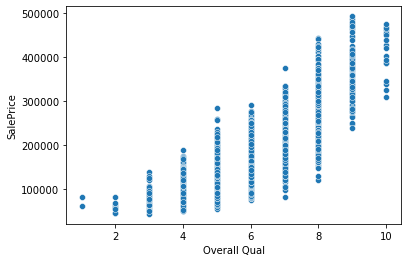

In [33]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);

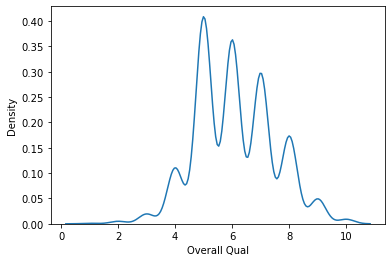

In [34]:
sns.kdeplot(x='Overall Qual',data=df);

<AxesSubplot:xlabel='Overall Qual', ylabel='count'>

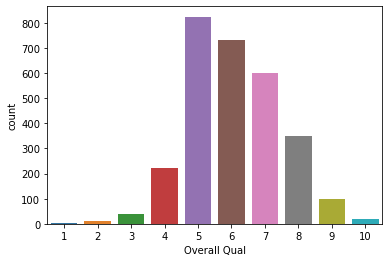

In [35]:
sns.countplot(x='Overall Qual',data=df)

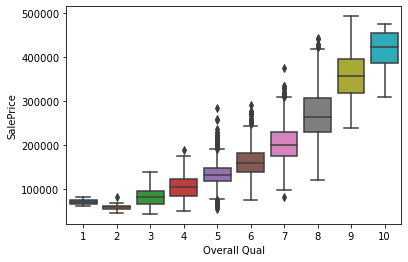

In [36]:
sns.boxplot(x='Overall Qual',y='SalePrice',data=df);

## Gr Liv Area

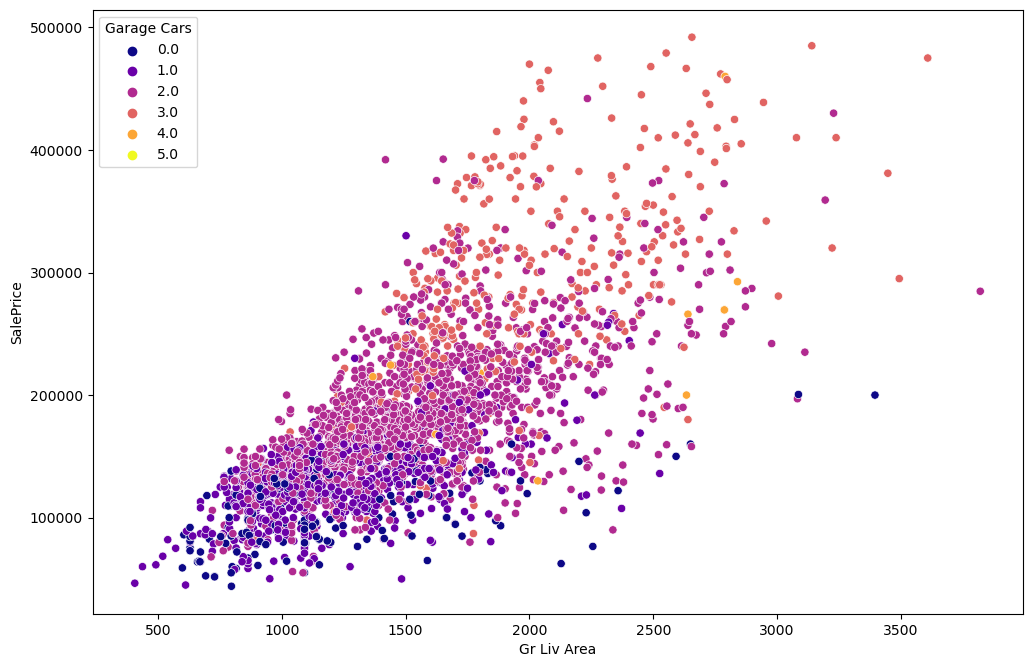

In [37]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df,hue='Garage Cars',palette='plasma');

In [38]:
df.index[df['Gr Liv Area']>=3000] & df.index[df['SalePrice']>=150000] & df.index[df['Garage Cars']==0.0]

df.loc[[2045,2194]][['Overall Qual','Total Bsmt SF','SalePrice']]

# for overall quality of 5,6 the sale price is considered okay and still among the group value
# however for a garage car = 0 and gr liv area is high it seems not okay to have the price like that

,Overall Qual,Total Bsmt SF,SalePrice
2045,5,1598.0,200500
2194,6,1440.0,200000


In [39]:
df.drop([2045,2194],axis=0,inplace=True)

In [40]:
df.index[df['Gr Liv Area']>=3500] & df.index[df['SalePrice']>=150000] & df.index[df['Garage Cars']==2.0]

print(df.loc[[1497]][['Overall Qual','Total Bsmt SF','SalePrice']])

df.drop([1497],axis=0,inplace=True)

# drop it because the sale price for overall quall is too high and the price for garage liv area above 3500 sqft with 2 garage car is quite low

      Overall Qual  Total Bsmt SF  SalePrice
1497             5            0.0     284700


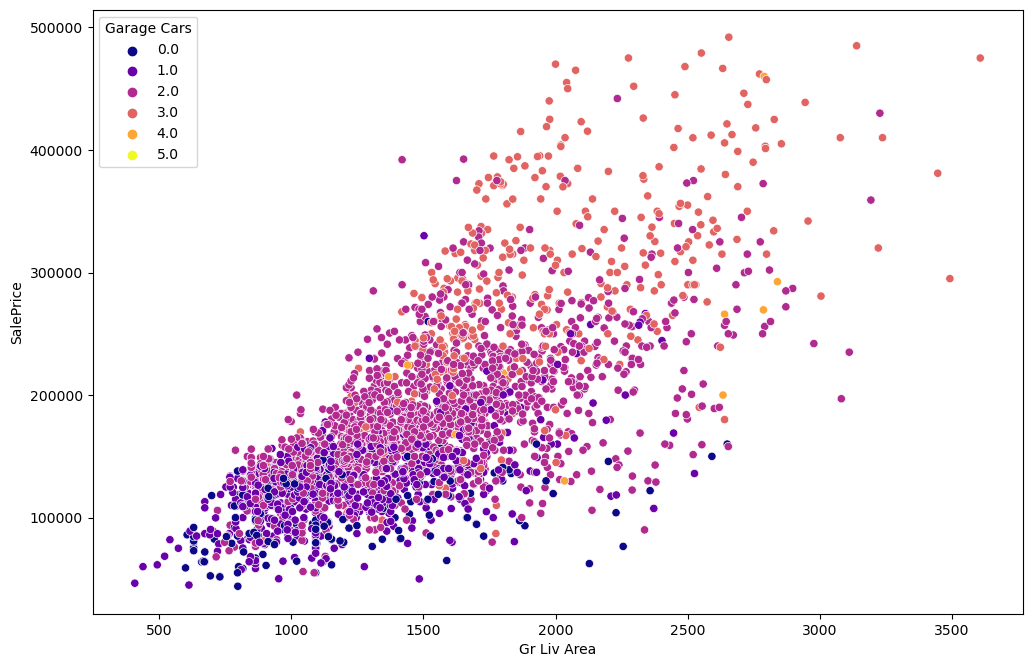

In [41]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df,hue='Garage Cars',palette='plasma');

# observe the current scatterplot after dropping few data 

In [42]:
df.index[df['Gr Liv Area']>=3000] 

#print(df.loc[[65,253,1306,1536]][['Overall Qual','Total Bsmt SF','SalePrice']])

#df.drop([],axis=0,inplace=True)

Int64Index([65, 253, 422, 565, 909, 1306, 1537, 1764, 1772, 2214, 2570, 2666], dtype='int64')

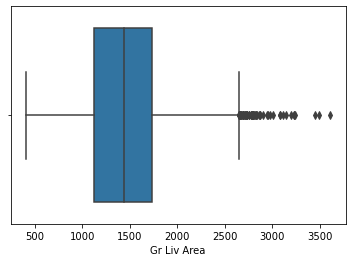

In [43]:
sns.boxplot(x='Gr Liv Area',data=df);

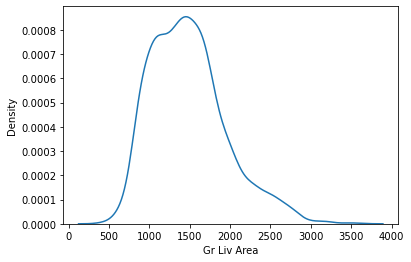

In [44]:
sns.kdeplot(x='Gr Liv Area',data=df);

## Garage Area

In [45]:
df.corr()['Garage Area'].sort_values()

PID               -0.205487
Overall Cond      -0.151071
Enclosed Porch    -0.110352
MS SubClass       -0.099703
Kitchen AbvGr     -0.052909
Low Qual Fin SF   -0.038578
Misc Val          -0.028199
Bsmt Half Bath    -0.025369
Yr Sold           -0.013883
BsmtFin SF 2       0.002416
Pool Area          0.025803
3Ssn Porch         0.031887
Mo Sold            0.039441
Screen Porch       0.047148
Bedroom AbvGr      0.071532
2nd Flr SF         0.114626
Half Bath          0.159291
Bsmt Unf SF        0.163369
Bsmt Full Bath     0.169906
Lot Area           0.184832
Open Porch SF      0.220539
Wood Deck SF       0.226257
Fireplaces         0.276998
BsmtFin SF 1       0.279152
TotRms AbvGrd      0.306798
Mas Vnr Area       0.340941
Lot Frontage       0.342184
Year Remod/Add     0.367998
Full Bath          0.398463
Gr Liv Area        0.467246
Total Bsmt SF      0.468131
1st Flr SF         0.472107
Year Built         0.476089
Overall Qual       0.553269
Garage Yr Blt      0.553908
SalePrice          0

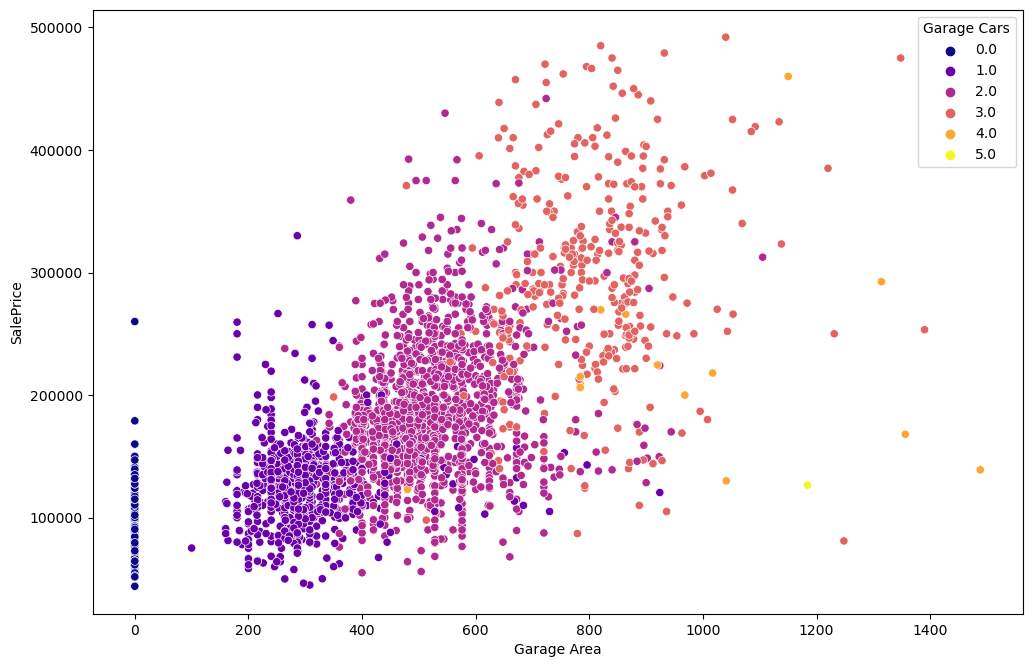

In [46]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x='Garage Area',y='SalePrice',data=df,hue='Garage Cars',palette='plasma');

In [47]:
df['Garage Area'].skew()

0.19090131603184218

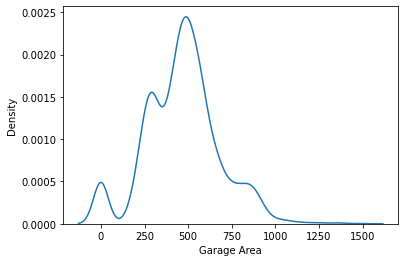

In [48]:
sns.kdeplot(data=df,x='Garage Area');

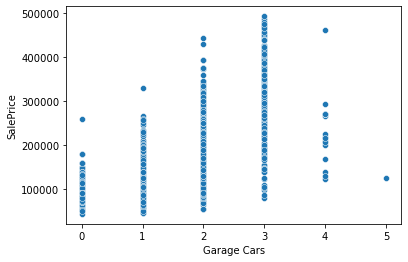

In [49]:
sns.scatterplot(x='Garage Cars',y='SalePrice',data=df);

In [50]:
print(df[df['Overall Qual']==5].mean()['SalePrice'])
print(df['Total Bsmt SF'].mean())

#average sale price for 5th rank in Overall Quality is  13000 ++ which is lower compared to 4 Garage Cars

134287.13625304136
1041.4110726643598


In [51]:
df.index[df['Garage Cars']==4] & df.index[df['SalePrice']>=400000]

df.loc[1059][['Overall Qual','Garage Area']]

df.drop([1059],axis=0,inplace=True)

# although the price is considered as an outlier for a house with a garage cars of 4 but it has highest overall quality and bigger than average total bsmt

In [52]:
df.loc[df['Garage Cars']==5.0][['Overall Qual','SalePrice','Total Bsmt SF']]

# the sale price for garage cars of 5 is 126500
# with an overall quality of 5 it has a sale price lower than average 
# it has slighty higher size of total bsmt sf
# garage cars =4 had higher SalePrice 
# drop the rows as it may be a typo error or mistake in kick in the data as it had the highest overall quality and higher than average total bsmt sf

df.drop([746],axis=0,inplace=True)

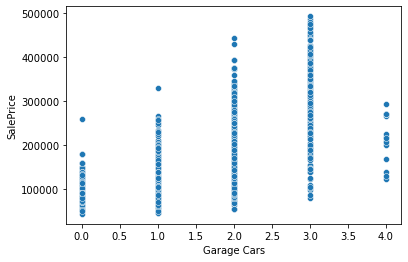

In [53]:
sns.scatterplot(x='Garage Cars',y='SalePrice',data=df);

In [54]:
df.index[df['Garage Cars']==0.0] & df.index[df['SalePrice']>=200000]

print(df.loc[1407][['Overall Qual','Gr Liv Area','Garage Cars','SalePrice']])

df.drop([1407],axis=0,inplace=True)

# drop it because for garage cars of 0.0 and Gr liv area of 1518, the group of sale price is below 260000 
# even with overall quality of 5, the group is under 300000 and the most common value is under 200000

Overall Qual         5
Gr Liv Area       1518
Garage Cars          0
SalePrice       260000
Name: 1407, dtype: object


In [55]:
df.index[df['Garage Cars']==1.0] & df.index[df['SalePrice']>=300000]

print(df.loc[2256][['Overall Qual','Garage Area','Garage Cars','SalePrice']])

df.drop([2256],axis=0,inplace=True)

#drop it because it also considered outliers in garage area of its garage cars group

Overall Qual         7
Garage Area        286
Garage Cars          1
SalePrice       330000
Name: 2256, dtype: object


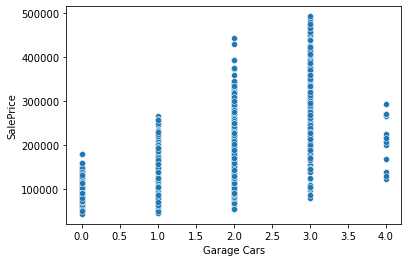

In [56]:
sns.scatterplot(x='Garage Cars',y='SalePrice',data=df);

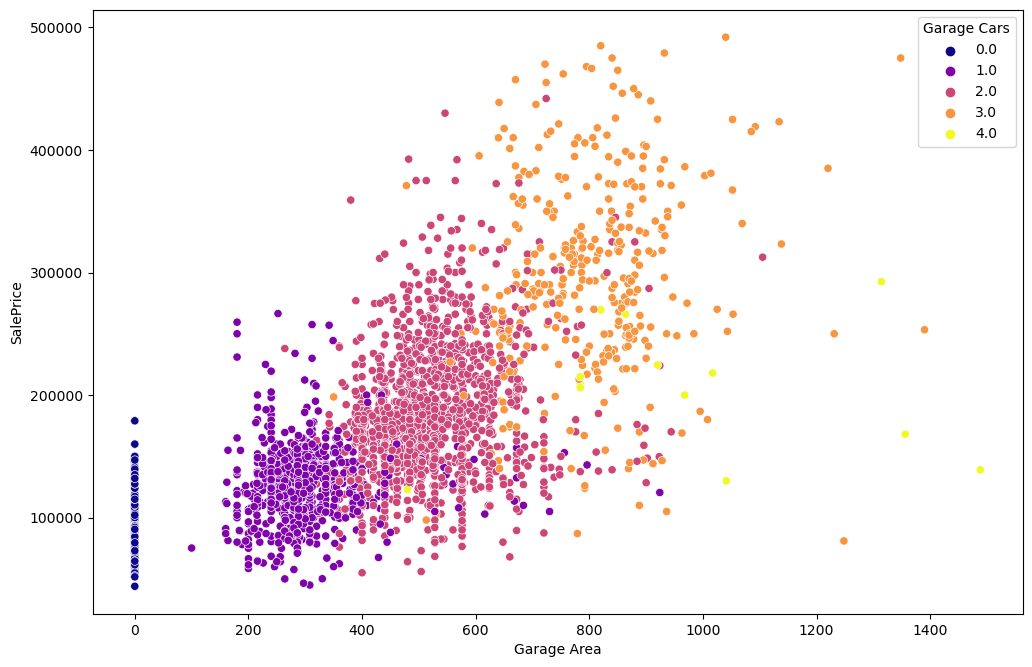

In [57]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x='Garage Area',y='SalePrice',data=df,hue='Garage Cars',palette='plasma');

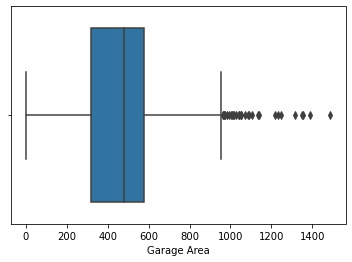

In [58]:
sns.boxplot(x='Garage Area',data=df);

In [59]:
df.index[df['Garage Area']>=1300]

df.drop([426,1027,1258,2282],axis=0,inplace=True)

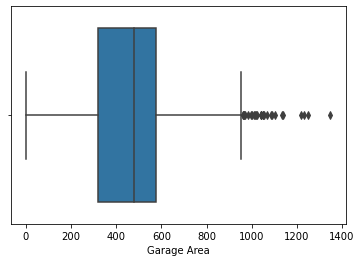

In [60]:
sns.boxplot(x='Garage Area',data=df);

In [61]:
len(df) # so far we had removed 28 outliers in the data set

2883

## Total Basement Square Feet

In [62]:
df.corr()['Total Bsmt SF'].sort_values()

2nd Flr SF        -0.253855
MS SubClass       -0.230750
PID               -0.197739
Overall Cond      -0.183719
Half Bath         -0.093125
Enclosed Porch    -0.080415
Kitchen AbvGr     -0.038016
Low Qual Fin SF   -0.032272
Yr Sold           -0.012334
Misc Val          -0.010574
Pool Area         -0.000359
Bsmt Half Bath     0.001145
Mo Sold            0.025825
3Ssn Porch         0.043880
Bedroom AbvGr      0.052670
Screen Porch       0.064379
BsmtFin SF 2       0.095163
Lot Area           0.211063
Wood Deck SF       0.213413
Open Porch SF      0.217347
TotRms AbvGrd      0.231581
Year Remod/Add     0.287963
Lot Frontage       0.304427
Fireplaces         0.307206
Bsmt Full Bath     0.314201
Full Bath          0.319621
Garage Yr Blt      0.342529
Mas Vnr Area       0.345313
Gr Liv Area        0.382849
Year Built         0.409251
Bsmt Unf SF        0.431418
Garage Cars        0.441378
Garage Area        0.472283
BsmtFin SF 1       0.477323
Overall Qual       0.528602
SalePrice          0

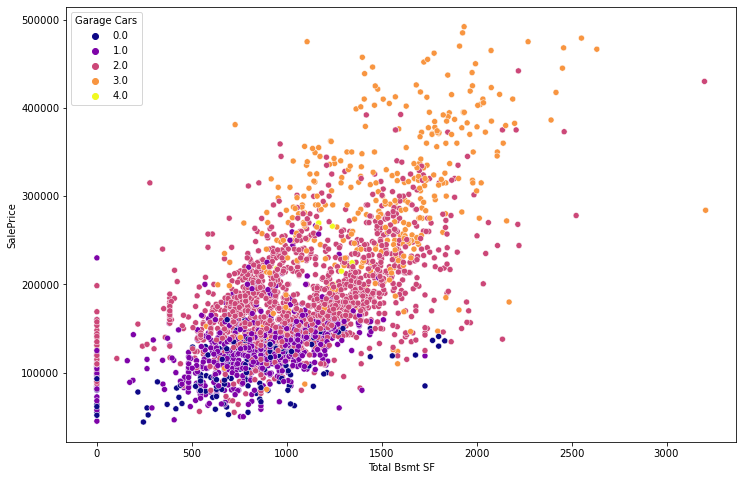

In [63]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Total Bsmt SF',y='SalePrice',data=df,hue='Garage Cars',palette='plasma');

In [64]:
df.index[df['Overall Qual']==8] & df.index[df['Total Bsmt SF']>=3000]

df.drop([444, 1772],axis=0,inplace=True)

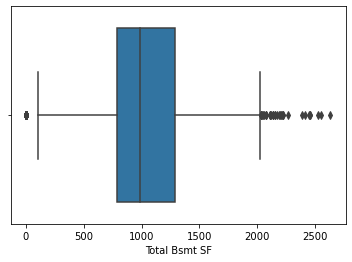

In [65]:
sns.boxplot(x='Total Bsmt SF',data=df);

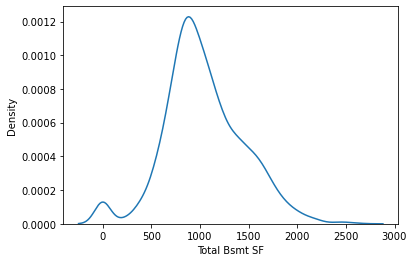

In [66]:
sns.kdeplot(x='Total Bsmt SF',data=df);

## 1st Floor Square Feet

In [67]:
df.corr()['1st Flr SF'].sort_values()

2nd Flr SF        -0.301742
MS SubClass       -0.258734
Overall Cond      -0.168704
Half Bath         -0.151359
PID               -0.146379
Enclosed Porch    -0.067960
Low Qual Fin SF   -0.019062
Yr Sold           -0.014986
Misc Val          -0.009766
Bsmt Half Bath    -0.002064
Mo Sold            0.050149
3Ssn Porch         0.051470
Pool Area          0.071227
Kitchen AbvGr      0.088825
BsmtFin SF 2       0.090816
Screen Porch       0.093780
Bedroom AbvGr      0.102031
Open Porch SF      0.193626
Wood Deck SF       0.208992
Year Remod/Add     0.226700
Bsmt Full Bath     0.243831
Garage Yr Blt      0.250425
Lot Area           0.286752
Bsmt Unf SF        0.305689
Year Built         0.305790
TotRms AbvGrd      0.343536
Mas Vnr Area       0.348588
Full Bath          0.358289
Fireplaces         0.384631
BsmtFin SF 1       0.397024
Lot Frontage       0.421438
Garage Cars        0.440401
Overall Qual       0.456300
Garage Area        0.475963
Gr Liv Area        0.504224
SalePrice          0

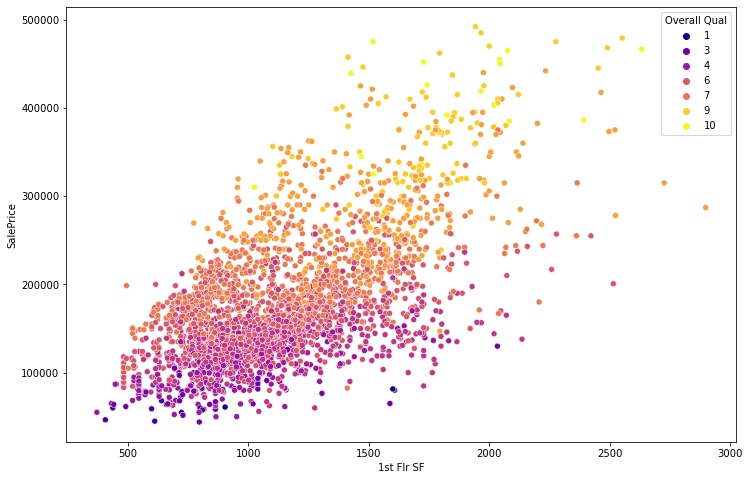

In [68]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='1st Flr SF',y='SalePrice',data=df,hue='Overall Qual',palette='plasma');

In [69]:
df.index[df['Overall Qual']==8] & df.index[df['1st Flr SF']>=2500] & df.index[df['SalePrice']<=400000]

print(df.loc[[349, 379, 1572, 2230]][['SalePrice','Overall Qual']])


df.drop([349, 379, 1572, 2230],axis=0,inplace=True)

      SalePrice  Overall Qual
349      375000             8
379      278000             8
1572     287000             8
2230     315000             8


In [70]:
df.index[df['Overall Qual']==6] & df.index[df['1st Flr SF']>=2500] & df.index[df['SalePrice']<=300000]

print(df.loc[[2229]][['SalePrice','Overall Qual']])

df.drop([2229],axis=0,inplace=True)

      SalePrice  Overall Qual
2229     200624             6


In [71]:
df.index[df['1st Flr SF']>=2200]

df.drop([136,  447,  448,  457,  513,  937, 1056, 1425, 1614, 1641,1695, 1763, 1854, 2077, 2222],axis=0,inplace=True)

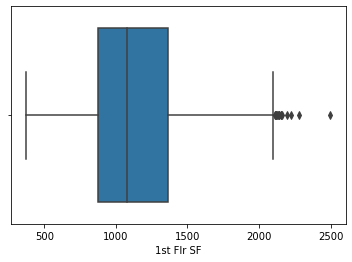

In [72]:
sns.boxplot(x='1st Flr SF',data=df);

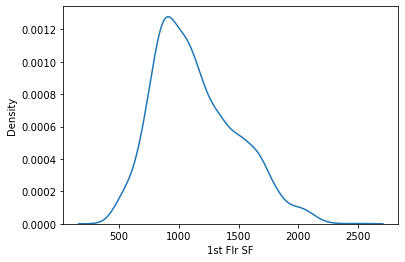

In [73]:
sns.kdeplot(x='1st Flr SF',data=df);

In [74]:
df.corr()['Full Bath']

PID               -0.166502
MS SubClass        0.145499
Lot Frontage       0.160425
Lot Area           0.101788
Overall Qual       0.516018
Overall Cond      -0.224326
Year Built         0.471401
Year Remod/Add     0.453894
Mas Vnr Area       0.242276
BsmtFin SF 1       0.051292
BsmtFin SF 2      -0.091970
Bsmt Unf SF        0.269614
Total Bsmt SF      0.312786
1st Flr SF         0.353277
2nd Flr SF         0.396244
Low Qual Fin SF   -0.013935
Gr Liv Area        0.626277
Bsmt Full Bath    -0.032850
Bsmt Half Bath    -0.048176
Full Bath          1.000000
Half Bath          0.148305
Bedroom AbvGr      0.347242
Kitchen AbvGr      0.175477
TotRms AbvGrd      0.512241
Fireplaces         0.212817
Garage Yr Blt      0.494398
Garage Cars        0.479103
Garage Area        0.405622
Wood Deck SF       0.163817
Open Porch SF      0.251658
Enclosed Porch    -0.128282
3Ssn Porch         0.017799
Screen Porch      -0.032344
Pool Area          0.012809
Misc Val          -0.020177
Mo Sold            0

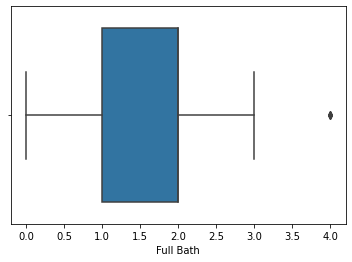

In [75]:
sns.boxplot(x='Full Bath',data=df);

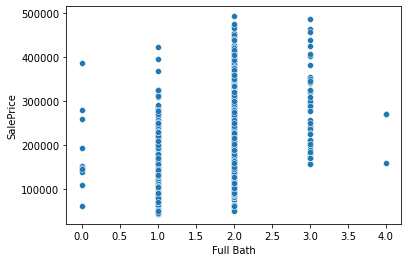

In [76]:
sns.scatterplot(x='Full Bath',y='SalePrice',data=df);

## Year Remodeled / Add

In [77]:
df.corr()['Year Built'].sort_values()

Enclosed Porch    -0.377204
Overall Cond      -0.375828
PID               -0.337402
Low Qual Fin SF   -0.140838
Kitchen AbvGr     -0.135444
Bedroom AbvGr     -0.056743
Screen Porch      -0.053267
BsmtFin SF 2      -0.030500
Bsmt Half Bath    -0.030415
Misc Val          -0.027842
Yr Sold           -0.015374
Pool Area         -0.010931
Lot Area           0.010920
Mo Sold            0.013895
2nd Flr SF         0.014781
3Ssn Porch         0.016730
MS SubClass        0.043669
TotRms AbvGrd      0.091836
Lot Frontage       0.106306
Bsmt Unf SF        0.127916
Fireplaces         0.158704
Open Porch SF      0.198409
Bsmt Full Bath     0.200449
Wood Deck SF       0.224302
Gr Liv Area        0.231285
Half Bath          0.261986
BsmtFin SF 1       0.265274
Mas Vnr Area       0.299118
1st Flr SF         0.307333
Total Bsmt SF      0.410706
Full Bath          0.471401
Garage Area        0.484321
Garage Cars        0.537811
SalePrice          0.582239
Overall Qual       0.591387
Year Remod/Add     0

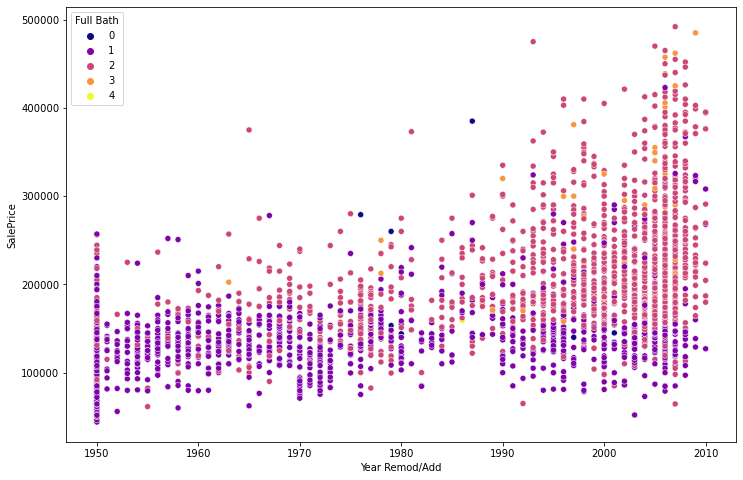

In [78]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Remod/Add',y='SalePrice',data=df,hue='Full Bath',palette='plasma');

In [79]:
df.index[df['Overall Qual']==7] & df.index[df['Year Remod/Add']<=1970] & df.index[df['SalePrice']>=300000]

print(df.loc[[956]][['SalePrice','Garage Yr Blt','Year Built']])

df.drop([956],axis=0,inplace=True)

# drop it because for older house should not have price that is higher

     SalePrice  Garage Yr Blt  Year Built
956     375000         1965.0        1965


In [80]:
df.index[df['Overall Qual']==9] & df.index[df['Year Remod/Add']<=1990] & df.index[df['SalePrice']>=300000]

print(df.loc[[2522]][['SalePrice','Garage Yr Blt','Year Built']])

df.drop([2522],axis=0,inplace=True)

      SalePrice  Garage Yr Blt  Year Built
2522     385000         1981.0        1981


In [81]:
df.index[df['Overall Qual']==8] & df.index[df['Year Remod/Add']<=1990] & df.index[df['SalePrice']>=300000]

print(df.loc[[1832,1860]][['SalePrice','Garage Yr Blt','Year Built']])

df.drop([1832,1860],axis=0,inplace=True)

      SalePrice  Garage Yr Blt  Year Built
1832     302000         1990.0        1990
1860     373000         1981.0        1981


In [82]:
df.index[df['Overall Qual']==10] & df.index[df['Year Remod/Add']<=2000] & df.index[df['SalePrice']>=400000]

print(df.loc[[2666]][['SalePrice','Garage Yr Blt','Year Built']])

df.drop([2666],axis=0,inplace=True)

      SalePrice  Garage Yr Blt  Year Built
2666     475000         1993.0        1892


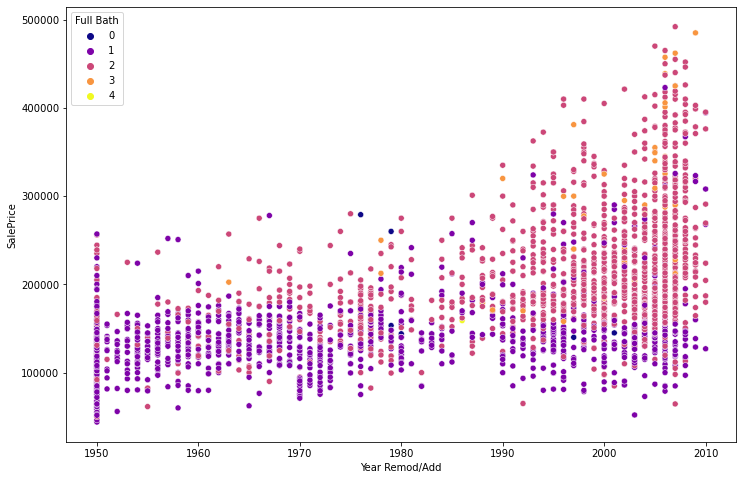

In [83]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Remod/Add',y='SalePrice',data=df,hue='Full Bath',palette='plasma');

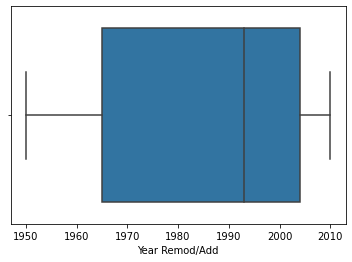

In [84]:
sns.boxplot(x='Year Remod/Add',data=df);

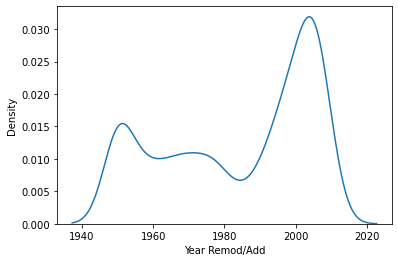

In [85]:
sns.kdeplot(x='Year Remod/Add',data=df);

In [86]:
len(df)

2856

## Garage Year Built

In [87]:
df.corr()['Garage Yr Blt'].sort_values()

Overall Cond      -0.333642
Enclosed Porch    -0.305125
PID               -0.249799
Kitchen AbvGr     -0.092467
Screen Porch      -0.077211
BsmtFin SF 2      -0.070537
Bsmt Half Bath    -0.059323
Low Qual Fin SF   -0.056374
Bedroom AbvGr     -0.051931
Pool Area         -0.028116
Misc Val          -0.025545
Lot Area          -0.021707
Yr Sold           -0.006271
3Ssn Porch         0.021951
Mo Sold            0.022645
Lot Frontage       0.059356
Fireplaces         0.076384
2nd Flr SF         0.079723
MS SubClass        0.093925
TotRms AbvGrd      0.138876
Bsmt Full Bath     0.140451
Bsmt Unf SF        0.167608
BsmtFin SF 1       0.174285
Half Bath          0.216886
Wood Deck SF       0.218768
Open Porch SF      0.226317
Mas Vnr Area       0.238004
1st Flr SF         0.253590
Gr Liv Area        0.261283
Total Bsmt SF      0.345165
Full Bath          0.495401
SalePrice          0.550630
Garage Area        0.564350
Overall Qual       0.566488
Garage Cars        0.588543
Year Remod/Add     0

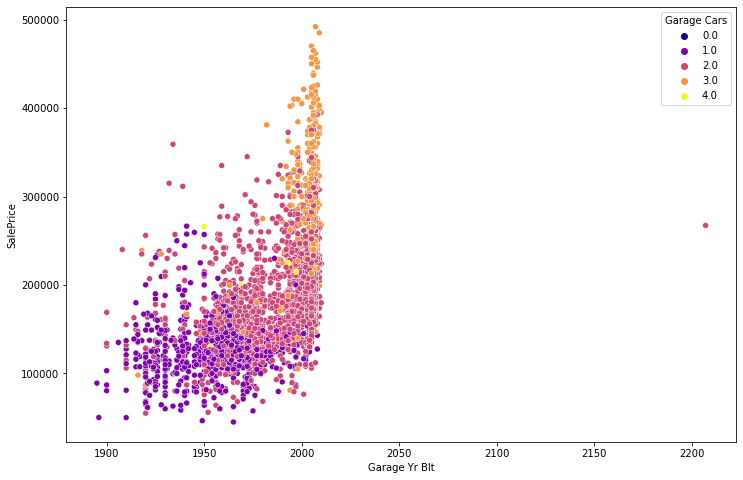

In [88]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Yr Blt',y='SalePrice',data=df,hue='Garage Cars',palette='plasma');

In [89]:
df.index[df['Garage Yr Blt']>=2200] & df.index[df['SalePrice']<=300000]

print(df.loc[[2260]][['SalePrice','Garage Yr Blt','Year Built']])

df.drop([2260],axis=0,inplace=True)

# maybe a typo in the year built bcs it is too far away from group

      SalePrice  Garage Yr Blt  Year Built
2260     267300         2207.0        2006


In [90]:
df.index[df['Garage Yr Blt']<=1940] & df.index[df['SalePrice']>=300000]

print(df.loc[[1538,2214,2218]][['SalePrice','Garage Yr Blt','Year Built']])

df.drop([1538,2214,2218],axis=0,inplace=True)

      SalePrice  Garage Yr Blt  Year Built
1538     311500         1939.0        1939
2214     359100         1934.0        1934
2218     315000         1932.0        1932


In [91]:
df.index[df['Garage Yr Blt']<=1910] & df.index[df['SalePrice']>=200000]

print(df.loc[[1406]][['SalePrice','Garage Yr Blt','Year Built']])

df.drop([1406],axis=0,inplace=True)

      SalePrice  Garage Yr Blt  Year Built
1406     240000         1908.0        1908


In [92]:
df.index[df['Garage Cars']==3.0] & df.index[df['SalePrice']<=100000]

print(df.loc[[1310, 1557, 2658]][['SalePrice','Garage Yr Blt','Year Built']])

df.drop([1310,2658],axis=0,inplace=True)

      SalePrice  Garage Yr Blt  Year Built
1310      98000         1916.0        1916
1557      81000         1994.0        1935
2658      87000         1920.0        1900


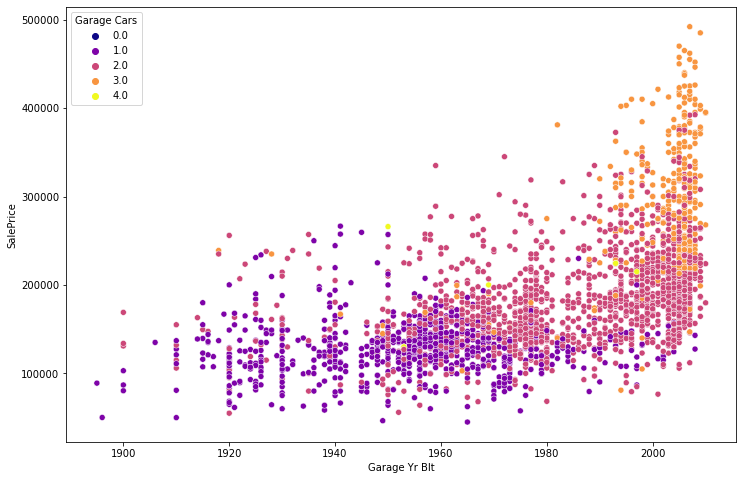

In [93]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Yr Blt',y='SalePrice',data=df,hue='Garage Cars',palette='plasma');

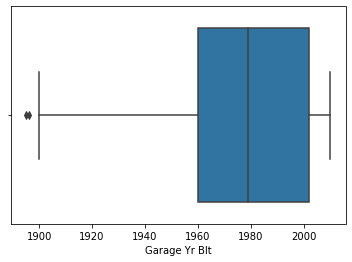

In [94]:
sns.boxplot(x='Garage Yr Blt',data=df);

In [95]:
df.index[df['Garage Yr Blt']<1900]

df.drop([307,1554],inplace=True)

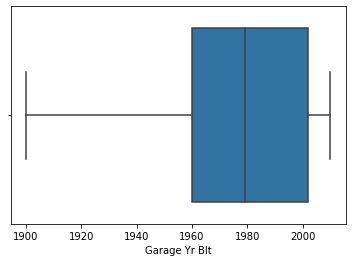

In [96]:
sns.boxplot(x='Garage Yr Blt',data=df);

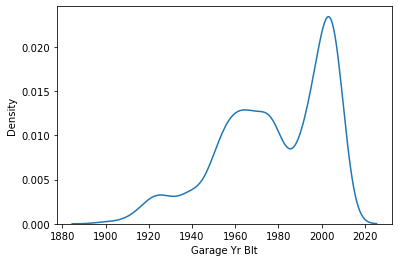

In [97]:
sns.kdeplot(x='Garage Yr Blt',data=df);

## Masonry Veneer Area

In [98]:
df.corr()['Mas Vnr Area'].sort_values()

PID               -0.220919
Overall Cond      -0.129582
Enclosed Porch    -0.110189
Low Qual Fin SF   -0.056223
Kitchen AbvGr     -0.046277
Misc Val          -0.021966
Yr Sold           -0.019795
BsmtFin SF 2      -0.019182
Pool Area         -0.014028
Bsmt Half Bath     0.006234
Mo Sold            0.008926
3Ssn Porch         0.019099
MS SubClass        0.022775
Screen Porch       0.054871
Bsmt Unf SF        0.080225
Bedroom AbvGr      0.086589
Lot Area           0.098597
2nd Flr SF         0.111495
Bsmt Full Bath     0.113530
Open Porch SF      0.116740
Wood Deck SF       0.134837
Half Bath          0.167343
Year Remod/Add     0.176740
Lot Frontage       0.182572
TotRms AbvGrd      0.235449
BsmtFin SF 1       0.236183
Garage Yr Blt      0.237188
Full Bath          0.244024
Fireplaces         0.250941
Year Built         0.298420
Total Bsmt SF      0.332133
Garage Area        0.335626
1st Flr SF         0.338517
Garage Cars        0.339358
Gr Liv Area        0.352384
Overall Qual       0

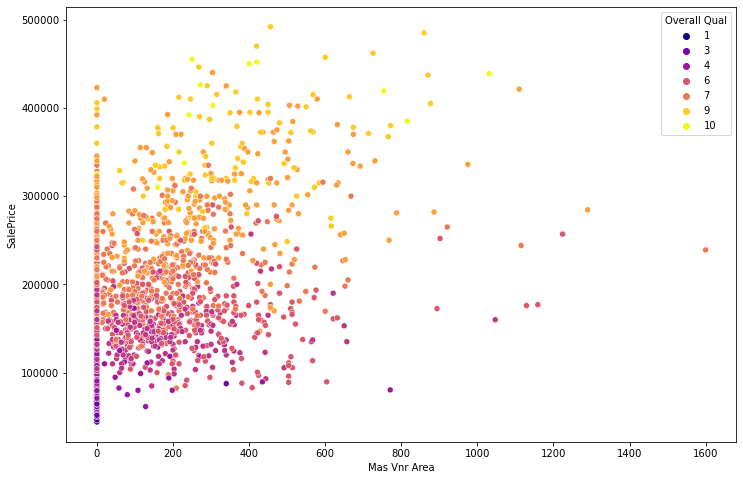

In [99]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Mas Vnr Area',y='SalePrice',data=df,hue='Overall Qual',palette='plasma');

In [100]:
df.index[df['Mas Vnr Area']>=1400] & df.index[df['SalePrice']<=300000]

print(df.loc[[1849]][['SalePrice','Overall Qual','Year Built']])

df.drop([1849],axis=0,inplace=True)

      SalePrice  Overall Qual  Year Built
1849     239000             7        1997


In [101]:
df.index[df['Mas Vnr Area']>=600] & df.index[df['SalePrice']<=100000] & df.index[df['Overall Qual']==4]

print(df.loc[[169]][['SalePrice','Overall Qual','Year Built']])

df.drop([169],axis=0,inplace=True)

     SalePrice  Overall Qual  Year Built
169      80400             4        1900


In [102]:
df.index[df['Mas Vnr Area']>=1000] & df.index[df['SalePrice']<=300000] & df.index[df['Overall Qual']==6]


print(df.loc[[101, 1843, 2258]][['SalePrice','Overall Qual','Mas Vnr Area']])

df.drop([101, 1843, 2258],axis=0,inplace=True)

      SalePrice  Overall Qual  Mas Vnr Area
101      177000             6        1159.0
1843     176000             6        1129.0
2258     257000             6        1224.0


In [103]:
df.index[df['Mas Vnr Area']>=1000] & df.index[df['SalePrice']<=300000] & df.index[df['Overall Qual']==8]


print(df.loc[[1098]][['SalePrice','Overall Qual','Mas Vnr Area']])

df.drop([1098],axis=0,inplace=True)

      SalePrice  Overall Qual  Mas Vnr Area
1098     284500             8        1290.0


In [104]:
df.index[df['Mas Vnr Area']>=1000] & df.index[df['SalePrice']<=300000] & df.index[df['Overall Qual']==5]


print(df.loc[[2607]][['SalePrice','Overall Qual','Mas Vnr Area']])

df.drop([2607],axis=0,inplace=True)

      SalePrice  Overall Qual  Mas Vnr Area
2607     159950             5        1047.0


In [105]:
df.index[df['Mas Vnr Area']>=1000] & df.index[df['SalePrice']<=300000] & df.index[df['Overall Qual']==7]

print(df.loc[[1613]][['SalePrice','Overall Qual','Mas Vnr Area']])

df.drop([1613],axis=0,inplace=True)

      SalePrice  Overall Qual  Mas Vnr Area
1613     244000             7        1115.0


In [106]:
df.index[df['Mas Vnr Area']>=800] & df.index[df['SalePrice']<=200000] & df.index[df['Overall Qual']==6]

print(df.loc[[570]][['SalePrice','Overall Qual','Mas Vnr Area']])

df.drop([570],axis=0,inplace=True)

     SalePrice  Overall Qual  Mas Vnr Area
570     172500             6         894.0


In [107]:
df.index[df['Mas Vnr Area']>=32]

df.drop([1067,2336],axis=0,inplace=True)

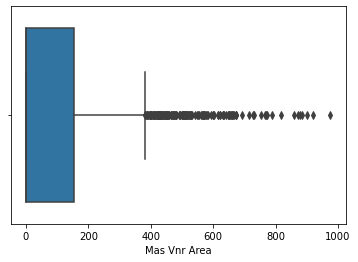

In [108]:
sns.boxplot(x='Mas Vnr Area',data=df);

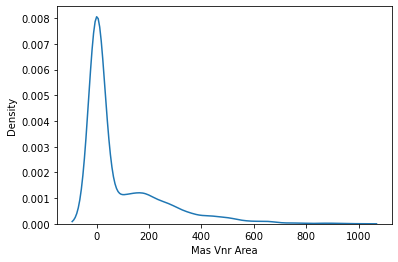

In [109]:
sns.kdeplot(x='Mas Vnr Area',data=df);

## Evaluate Data after Removing Outliers

In [110]:
len(df)

2836

In [111]:
2930 -2836 # removed 49 rows of outliers

94

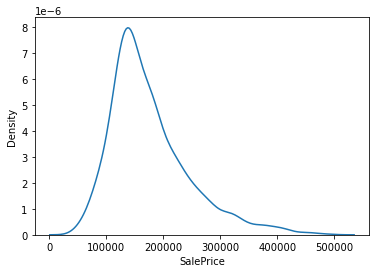

In [112]:
sns.kdeplot(x='SalePrice',data=df);

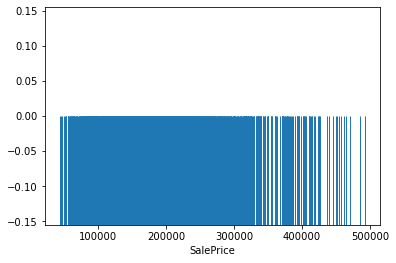

In [113]:
sns.rugplot(x='SalePrice',data=df,height=0.5);

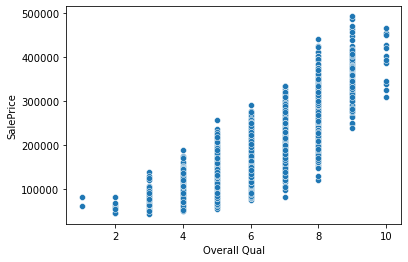

In [114]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);

In [115]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## save remove outliers dataset

In [116]:
df.to_csv ('Ames_Housing_Remove_Outliers(not_remove_skew_yet).csv',index=False)
